In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("new_student-mat.csv")

categorical = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical, drop_first=True)

In [ ]:
data['avg_grade'] = (data['G1'] + data['G2']) / 2
data['engagement_score'] = data['studytime'] - data['goout']

features = ['G1', 'G2', 'studytime', 'failures', 'absences', 'avg_grade', 'engagement_score']
X = data[features]
y = data['G3']
X = X[(X['absences'] < 50) & (X['failures'] < 4)]
y = y[X.index]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

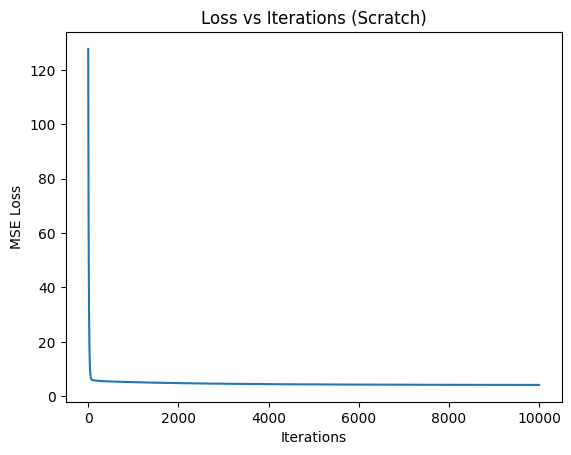

In [ ]:
class LinearRegressionScratch:
    def __init__(self, lr=0.0001, iterations=10000):
        self.lr = lr
        self.iterations = iterations
        self.losses = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for _ in range(self.iterations):
            predictions = X.dot(self.theta)
            errors = predictions - y
            gradient = (1 / m) * X.T.dot(errors)
            self.theta -= self.lr * gradient
            loss = np.mean(errors ** 2)
            self.losses.append(loss)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.theta)

scratch_model = LinearRegressionScratch()
scratch_model.fit(X_train.values, y_train.values)
y_pred_scratch = scratch_model.predict(X_test.values)

plt.plot(range(len(scratch_model.losses)), scratch_model.losses)
plt.title("Loss vs Iterations (Scratch)")
plt.xlabel("Iterations")
plt.ylabel("MSE Loss")
plt.savefig("training_loss_curve.png", dpi=300)
plt.show()

In [9]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_sklearn = lr_model.predict(X_test)

print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)


Coefficients: [-0.01049328  0.76744804 -0.09667131 -0.38387401  0.06616865  0.37847738
 -0.09561782]
Intercept: -1.984865669135436


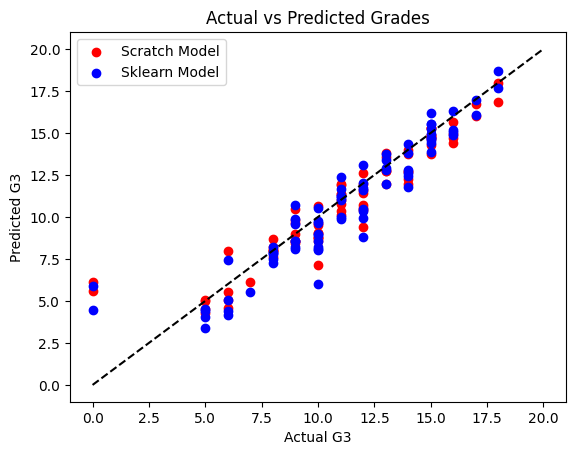

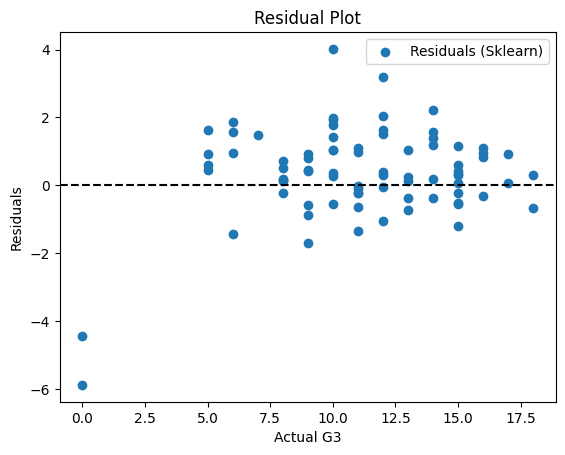

In [10]:
plt.scatter(y_test, y_pred_scratch, color='red', label='Scratch Model')
plt.scatter(y_test, y_pred_sklearn, color='blue', label='Sklearn Model')
plt.plot([0, 20], [0, 20], color='black', linestyle='--')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.legend()
plt.title("Actual vs Predicted Grades")
plt.savefig("actual_vs_predicted.png", dpi=300)
plt.show()

plt.scatter(y_test, y_test - y_pred_sklearn, label='Residuals (Sklearn)')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Actual G3")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.savefig("residual_plot.png", dpi=300)
plt.show()

In [11]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)


In [12]:
def evaluate(y_true, y_pred, name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\nMSE = {mse:.2f}, RMSE = {rmse:.2f}, R² = {r2:.2f}\n")

evaluate(y_test, y_pred_scratch, "Linear Regression (Scratch)")
evaluate(y_test, y_pred_sklearn, "Linear Regression (Sklearn)")
evaluate(y_test, y_pred_poly, "Polynomial Regression (Degree 2)")

Linear Regression (Scratch):
MSE = 1.77, RMSE = 1.33, R² = 0.87

Linear Regression (Sklearn):
MSE = 1.95, RMSE = 1.40, R² = 0.86

Polynomial Regression (Degree 2):
MSE = 2.84, RMSE = 1.68, R² = 0.80



In [14]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

theta = scratch_model.theta  
feature_names = ['G1', 'G2', 'studytime', 'failures', 'absences', 'avg_grade', 'engagement_score']

G1_input = widgets.IntSlider(min=0, max=20, description='G1', value=10)
G2_input = widgets.IntSlider(min=0, max=20, description='G2', value=10)
studytime_input = widgets.IntSlider(min=1, max=20, description='Studytime', value=5)
failures_input = widgets.IntSlider(min=0, max=4, description='Failures', value=0)
absences_input = widgets.IntSlider(min=0, max=50, description='Absences', value=0)
goout_input = widgets.IntSlider(min=1, max=5, description='Go Out', value=3)

predict_button = widgets.Button(description="Predict Final Grade (G3)")
output = widgets.Output()

def predict_final_grade(button):
    with output:
        output.clear_output()
        G1 = G1_input.value
        G2 = G2_input.value
        studytime = studytime_input.value
        failures = failures_input.value
        absences = absences_input.value
        goout = goout_input.value
        
        avg_grade = (G1 + G2) / 2
        engagement_score = studytime - goout
        x_input = np.array([G1, G2, studytime, failures, absences, avg_grade, engagement_score])
        x_input = np.insert(x_input, 0, 1)  
        prediction = np.dot(x_input, theta)
        
        print(f"Predicted Final Grade (G3): {prediction:.2f}")
predict_button.on_click(predict_final_grade)
display(G1_input, G2_input, studytime_input, failures_input, absences_input, goout_input, predict_button, output)


IntSlider(value=10, description='G1', max=20)

IntSlider(value=10, description='G2', max=20)

IntSlider(value=5, description='Studytime', max=20, min=1)

IntSlider(value=0, description='Failures', max=4)

IntSlider(value=0, description='Absences', max=50)

IntSlider(value=3, description='Go Out', max=5, min=1)

Button(description='Predict Final Grade (G3)', style=ButtonStyle())

Output()